# Program for Target Satisfaction (categorical variable)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Reading data file

In [2]:
raw_data = pd.read_csv("DATASETS/Salarysatisfaction.csv",encoding=('ISO-8859-1'),low_memory=False)

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2946 non-null   int64  
 1   Target_Salary               2946 non-null   float64
 2   Target_Satisfied            2946 non-null   int64  
 3   LOAN_AMT                    2946 non-null   object 
 4   Business Title              2946 non-null   object 
 5   Civil Service Title         2946 non-null   object 
 6   Division/Work Unit          2946 non-null   object 
 7   Job Description             2946 non-null   object 
 8   Minimum Qual Requirements   2926 non-null   object 
 9   Preferred Skills            2553 non-null   object 
 10  Additional Information      1854 non-null   object 
 11  To Apply                    2945 non-null   object 
 12  Hours/Shift                 884 non-null    object 
 13  Residency Requirement       2942 

In [4]:
df = pd.DataFrame() #making a new dataframe

# Selecting only meaningful column for Machine learning model

In [5]:
df = raw_data[['Target_Salary', 'Target_Satisfied','id', 'LOAN_AMT',
               'last_pymnt_amnt','term','loan_status','pymnt_plan','purpose','CompanySize','dti']]

# Pre-processing the caregorical values  into numerical data type

In [6]:
col_name = ['term','loan_status','pymnt_plan','purpose','CompanySize']

In [7]:
for name in col_name:
    df[name] = pd.factorize(df[name])[0]

<ipython-input-7-7d8785be3c1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = pd.factorize(df[name])[0]


In [8]:
df.head()

,Target_Salary,Target_Satisfied,id,LOAN_AMT,last_pymnt_amnt,term,loan_status,pymnt_plan,purpose,CompanySize,dti
0,42405.00,0,68407277,"$3,600.00",122.67,0,0,0,0,0,5.91
1,60740.00,1,68355089,"$24,700.00",926.35,0,0,0,1,1,16.06
2,51907.68,0,68341763,"$20,000.00",15813.30,1,0,0,2,0,10.78
3,51907.68,0,66310712,"$35,000.00",829.90,1,1,0,0,2,17.06
4,35.00,1,68476807,"$10,400.00",10128.96,1,0,0,3,1,25.37


# Pre-processing the feature LOAN_AMT to make it numerical datatype by removing Dollar and comma  symbol

In [9]:
df['LOAN_AMT'] = df['LOAN_AMT'].str.replace(',', '')
df['LOAN_AMT'] = df['LOAN_AMT'].str.replace('$', '')
df['LOAN_AMT'] = df['LOAN_AMT'].astype('float')

<ipython-input-9-10b887500cfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LOAN_AMT'] = df['LOAN_AMT'].str.replace(',', '')
<ipython-input-9-10b887500cfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LOAN_AMT'] = df['LOAN_AMT'].str.replace('$', '')
<ipython-input-9-10b887500cfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [10]:
df.head()

,Target_Salary,Target_Satisfied,id,LOAN_AMT,last_pymnt_amnt,term,loan_status,pymnt_plan,purpose,CompanySize,dti
0,42405.00,0,68407277,3600.0,122.67,0,0,0,0,0,5.91
1,60740.00,1,68355089,24700.0,926.35,0,0,0,1,1,16.06
2,51907.68,0,68341763,20000.0,15813.30,1,0,0,2,0,10.78
3,51907.68,0,66310712,35000.0,829.90,1,1,0,0,2,17.06
4,35.00,1,68476807,10400.0,10128.96,1,0,0,3,1,25.37


# Target_Satisfied is having class imbalance

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


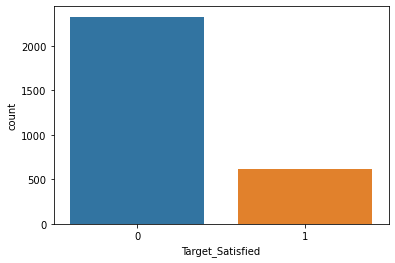

In [11]:
sns.countplot(df['Target_Satisfied'])
plt.show()

# Oversampling the Class-1

In [12]:
class_0_df = df[df['Target_Satisfied']==0]
class_1_df = df[df['Target_Satisfied']==1]

In [13]:
class_0_df.shape

(2327, 11)

In [14]:
class_1_df.shape

(619, 11)

In [15]:
class_1_df_over = class_1_df.sample(2327,replace=True)

In [16]:
class_1_df_over.shape

(2327, 11)

In [17]:
class_0_df.shape

(2327, 11)

In [18]:
balanced_df = pd.concat([class_0_df,class_1_df_over],axis=0)

In [19]:
balanced_df['Target_Satisfied'].value_counts()

1    2327
0    2327
Name: Target_Satisfied, dtype: int64

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


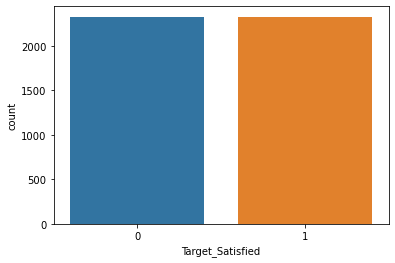

In [20]:
sns.countplot(balanced_df['Target_Satisfied'])
plt.show()

In [21]:
df = balanced_df

# Model Building

In [22]:
X = df.iloc[:,3:] # Feature Set

In [23]:
X.head()

,LOAN_AMT,last_pymnt_amnt,term,loan_status,pymnt_plan,purpose,CompanySize,dti
0,3600.0,122.67,0,0,0,0,0,5.91
2,20000.0,15813.30,1,0,0,2,0,10.78
3,35000.0,829.90,1,1,0,0,2,17.06
5,11950.0,7653.56,0,0,0,0,3,10.20
6,20000.0,15681.05,0,0,0,0,1,14.67


In [24]:
y = df['Target_Satisfied'] # Target variable

In [25]:
y.head()

0    0
2    0
3    0
5    0
6    0
Name: Target_Satisfied, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Performing Scaling on feature dataframe

In [27]:
sc =StandardScaler()
X = sc.fit_transform(X)

In [28]:
###Spliting the train and test data in 80:20 ratio

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1,stratify=y)

# Selecting the Random Forest Classifier for model

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
pred = model.predict(X_test)

# Model Evaluation

In [33]:
print("Classification Report \n")
print(classification_report(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       465
           1       0.89      0.97      0.93       466

    accuracy                           0.93       931
   macro avg       0.93      0.93      0.93       931
weighted avg       0.93      0.93      0.93       931



In [34]:
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Confusion Matrix

[[409  56]
 [ 13 453]]
